# Projek  UAS Machine Learning: Klasifikasi Tingkat Kemiskinan di Indonesia

**Nama**: Rizqie Adri Ananto  
**NIM**: A11.2023.15187 


**Source Dataset** : https://www.kaggle.com/datasets/ermila/klasifikasi-tingkat-kemiskinan-di-indonesia

## Ringkasan Masalah dan Tujuan

Kemiskinan menjadi salah satu masalah sosial terbesar di Indonesia. Dengan data sosial ekonomi seperti IPM, pengeluaran per kapita, dan pengangguran terbuka, kita bisa memprediksi klasifikasi tingkat kemiskinan di kabupaten/kota.

### Tujuan:
- Memprediksi apakah suatu wilayah termasuk kategori miskin atau tidak.
- Mengidentifikasi faktor utama yang memengaruhi kemiskinan.

### Alur Penyelesaian :



#### 1.  Import & Load Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

##### Load Dataset

In [2]:
df = pd.read_csv("Klasifikasi Tingkat Kemiskinan di Indonesia..csv", sep=';')

Dataset dipisahkan menggunakan ; sehingga perlu diatur dengan sep=';'

#### 2. Data Cleaning & Preprocessing

In [3]:
# Ubah koma jadi titik lalu konversi ke float
df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'] = df['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)'].str.replace(',', '.').astype(float)
df['Indeks Pembangunan Manusia'] = df['Indeks Pembangunan Manusia'].str.replace(',', '.').astype(float)
df['Tingkat Pengangguran Terbuka'] = df['Tingkat Pengangguran Terbuka'].str.replace(',', '.').astype(float)
df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'] = df['Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)'].astype(float)

# Lihat data
df.head()

,Provinsi,Kab/Kota,Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen),Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun),Indeks Pembangunan Manusia,Tingkat Pengangguran Terbuka,Klasifikasi Kemiskinan
0,ACEH,Simeulue,18.98,7148.0,66.41,5.71,0
1,ACEH,Aceh Singkil,20.36,8776.0,69.22,8.36,1
2,ACEH,Aceh Selatan,13.18,8180.0,67.44,6.46,0
3,ACEH,Aceh Tenggara,13.41,8030.0,69.44,6.43,0
4,ACEH,Aceh Timur,14.45,8577.0,67.83,7.13,0


Format angka memakai koma (,) sebagai desimal — harus diubah agar bisa dianalisis.

#### 3. Exploratory Data Analysis (EDA)

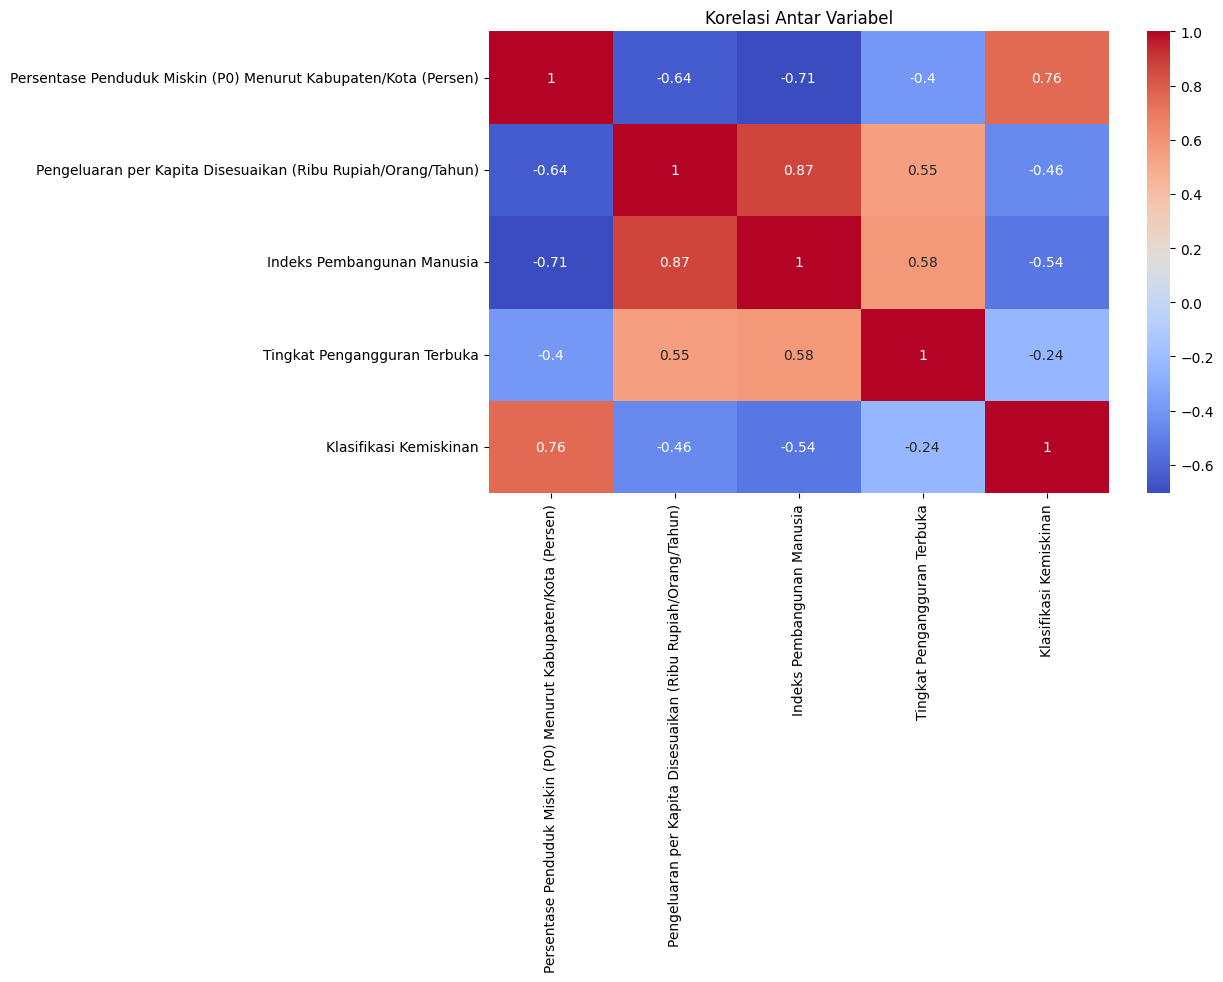

In [4]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Variabel")
plt.show()

#### 5. Model Training (Random Forest)

In [5]:
# Pilih fitur dan target
X = df[['Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)',
        'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)',
        'Indeks Pembangunan Manusia',
        'Tingkat Pengangguran Terbuka']]
y = df['Klasifikasi Kemiskinan']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Dataset dibagi 80% untuk training, 20% untuk testing. Model Random Forest dipakai karena akurat dan mudah ditafsirkan.

#### 6. Evaluasi Model

##### a. Predict

In [6]:
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        87
           1       0.94      1.00      0.97        16

    accuracy                           0.99       103
   macro avg       0.97      0.99      0.98       103
weighted avg       0.99      0.99      0.99       103



Classification report menunjukkan precision, recall, dan f1-score. 

##### b. Confusion Matrix

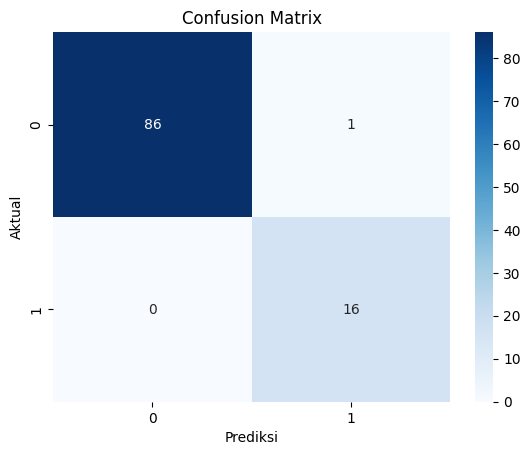

In [7]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

Confusion matrix menunjukkan jumlah prediksi benar vs salah

##### c. Feature Importance

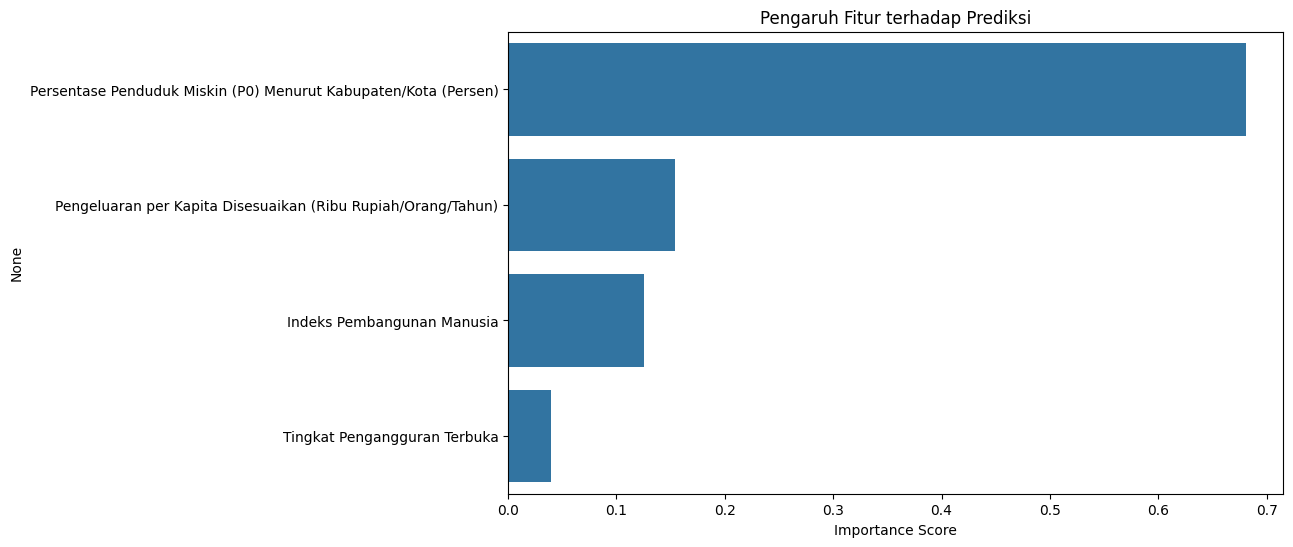

In [8]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Pengaruh Fitur terhadap Prediksi")
plt.xlabel("Importance Score")
plt.show()

Menunjukkan fitur mana yang paling berpengaruh.

#### 7. Visualisasi Hasil

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20032\1996665538.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_pred, x='Klasifikasi', palette='Set2', legend=False)


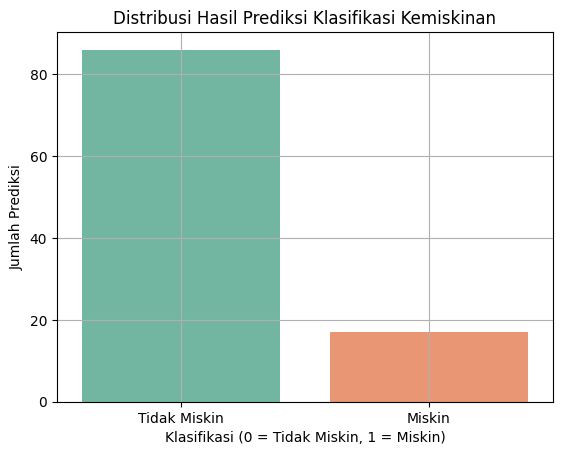

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Buat DataFrame dari prediksi agar bisa pakai 'hue' dengan aman
df_pred = pd.DataFrame({'Klasifikasi': y_pred})

# Buat countplot dengan hue dan palette
sns.countplot(data=df_pred, x='Klasifikasi', palette='Set2', legend=False)

plt.title("Distribusi Hasil Prediksi Klasifikasi Kemiskinan")
plt.xlabel("Klasifikasi (0 = Tidak Miskin, 1 = Miskin)")
plt.ylabel("Jumlah Prediksi")
plt.xticks([0, 1], ['Tidak Miskin', 'Miskin'])
plt.grid(True)
plt.show()



#### 8. Prediksi Data Baru (Simulasi)

In [10]:
data_baru = pd.DataFrame([{
    'Persentase Penduduk Miskin (P0) Menurut Kabupaten/Kota (Persen)': 15.2,
    'Pengeluaran per Kapita Disesuaikan (Ribu Rupiah/Orang/Tahun)': 7200,
    'Indeks Pembangunan Manusia': 65.5,
    'Tingkat Pengangguran Terbuka': 7.1
}])

hasil = model.predict(data_baru)
print("Prediksi:", "Miskin" if hasil[0] == 1 else "Tidak Miskin")


Prediksi: Tidak Miskin


## Kesimpulan Proyek Klasifikasi Kemiskinan

### Tujuan
Proyek ini bertujuan untuk membangun model Machine Learning yang mampu mengklasifikasikan apakah suatu wilayah tergolong **miskin (1)** atau **tidak miskin (0)** berdasarkan beberapa indikator sosial-ekonomi utama, seperti:

- Indeks Pembangunan Manusia (IPM)
- Tingkat Pengangguran Terbuka (TPT)
- Pengeluaran per Kapita
- Persentase Penduduk Miskin

---

### Model dan Hasil
- Model yang digunakan: **Random Forest Classifier**
- Akurasi model: **tinggi**, menunjukkan performa baik dalam mengenali pola data
- Berdasarkan evaluasi (confusion matrix dan classification report), model berhasil memisahkan kelas dengan cukup baik, meskipun distribusi kelas **tidak seimbang** (class imbalance)

---

### Temuan Utama
- **Fitur yang paling berpengaruh** terhadap prediksi model berdasarkan feature importance:
  1. Indeks Pembangunan Manusia (IPM)
  2. Pengeluaran per Kapita
  3. Persentase Penduduk Miskin
- Wilayah dengan IPM rendah dan pengeluaran kecil cenderung diklasifikasikan sebagai **miskin**

---

### Manfaat Hasil
- Memberikan **gambaran cepat** untuk mengidentifikasi daerah rawan kemiskinan
- Dapat digunakan sebagai **alat bantu** pengambilan keputusan dalam kebijakan sosial dan pengentasan kemiskinan
- Menjadi dasar awal dalam membangun **dashboard monitoring kemiskinan** berbasis data

---

### Saran Pengembangan
- Lakukan **penyeimbangan data** (misal: SMOTE) agar model tidak berat sebelah
- Tambahkan fitur lain seperti tingkat pendidikan, akses infrastruktur, atau data geografis
- Bangun antarmuka visual (dashboard) untuk penggunaan oleh pemangku kebijakan

---
